In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.integrate import simps, trapz

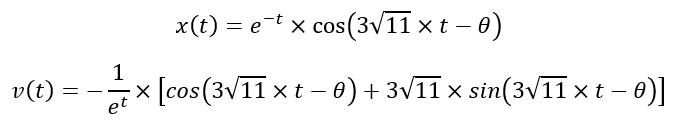

In [2]:
def v(t, theta):
    """
    Parameters:
    t (float or np.ndarray): Time variable.
    theta (float): Phase angle in radians.
    """
    sqrt_11 = np.sqrt(11)
    term1 = np.cos(3 * sqrt_11 * t - theta)
    term2 = 3 * sqrt_11 * np.sin(3 * sqrt_11 * t - theta)
    return -np.exp(-t) * (term1 + term2)

def x(t, theta):
    """
    Parameters:
    t (float or np.ndarray): Time variable.
    theta (float): Phase angle in radians.
    """
    return np.exp(-t) * np.cos(3 * np.sqrt(11) * t - theta)


In [3]:
def bisection_method(f, a, b, tol, theta):
    """
    Finds a root of f(t, theta) = 0 using the bisection method.

    Parameters:
    f (function): The function for which the root is to be found.
    a (float): Lower bound of the interval.
    b (float): Upper bound of the interval.
    tol (float): Tolerance for the solution.
    theta (float): Phase angle in radians.

    Returns:
    float: The estimated time where f(t, theta) = 0.
    """
    if f(a, theta) * f(b, theta) >= 0:
        raise ValueError("Function does not change sign in the interval [a, b].")

    while (b - a) / 2 > tol:
        c = (a + b) / 2
        if f(c, theta) == 0 or (b - a) / 2 < tol:
            return c
        elif f(a, theta) * f(c, theta) < 0:
            b = c
        else:
            a = c

    return (a + b) / 2

In [4]:
def optimization(f, t_values, h=1e-5):
    """
    Numerically calculates the derivative of function f using finite differences.

    Parameters:
    f (function): The function whose derivative is to be calculated.
    t_values (np.ndarray): Array of time values at which the derivative is calculated.
    h (float): Step size for the finite difference approximation.

    Returns:
    np.ndarray: Array of derivative values at t_values.
    """
    return (f(t_values + h, theta) - f(t_values - h, theta)) / (2 * h)

In [5]:
# Define parameters
theta = np.pi  # Example phase angle
tolerance = 1e-5

t1_1 = 0.1
t1_2 = 0.3
t2_1 = 0.6
t2_2 = 0.9

# Find the first zero crossing in the interval [0, 1]
t1 = bisection_method(x, t1_1, t1_2, tolerance, theta)

# Find the second zero crossing in the interval [1, 2]
t2 = bisection_method(x, t2_1, t2_2, tolerance, theta)

# Calculate the wavelength as the time difference between two zero crossings
wavelength = t2 - t1

print(f"---Finding Estimated Period Using Bisection Method---")
print()

print(f"First zero crossing in the interval [{t1_1} s, {t1_2} s]")
print(f"Second zero crossing in the interval [{t2_1} s, {t2_2} s]")
print()

print(f"First zero crossing at t1: {t1:.5f} s")
print(f"Second zero crossing at t2: {t2:.5f} s")
print(f"Estimated Period: {wavelength:.5f} s")

---Finding Estimated Period Using Bisection Method---

First zero crossing in the interval [0.1 s, 0.3 s]
Second zero crossing in the interval [0.6 s, 0.9 s]

First zero crossing at t1: 0.15787 s
Second zero crossing at t2: 0.78936 s
Estimated Period: 0.63149 s


In [6]:
def simpsons_rule(f, a, b, n, theta):
    """
    Approximates the integral of f(t, theta) from a to b using Simpson's Rule with n subintervals.

    Parameters:
    f (function): The function to integrate.
    a (float): The lower limit of integration.
    b (float): The upper limit of integration.
    n (int): Number of subintervals (must be even).
    theta (float): Phase angle in radians.

    Returns:
    float: Approximate value of the integral.
    """
    if n % 2 == 1:
        raise ValueError("Number of subintervals must be even.")

    h = (b - a) / n
    x = np.linspace(a, b, n+1)
    y = f(x, theta)

    integral = y[0] + y[-1] + 4 * np.sum(y[1:-1:2]) + 2 * np.sum(y[2:-2:2])
    return (h / 3) * integral

# Example parameters
a = 0        # Start time
b = 5        # End time
n = 20       # Number of subintervals (must be even)
theta = np.pi    # Example phase angle

# Compute the integral of v(t) from a to b
distance_traveled = simpsons_rule(v, a, b, n, theta)

print(f"Approximate distance traveled: {distance_traveled:.5f}")

Approximate distance traveled: 1.43849


In [7]:
def trapezoidal_rule(f, a, b, n, theta):
    """
    Approximates the integral of f(t, theta) from a to b using the trapezoidal rule with n subintervals.

    Parameters:
    f (function): The function to integrate.
    a (float): The lower limit of integration.
    b (float): The upper limit of integration.
    n (int): Number of subintervals.
    theta (float): Phase angle in radians.

    Returns:
    float: Approximate value of the integral.
    """
    h = (b - a) / n
    t_values = np.linspace(a, b, n+1)
    y_values = f(t_values, theta)

    integral = (h / 2) * (y_values[0] + 2 * np.sum(y_values[1:-1]) + y_values[-1])
    return integral

# Example parameters
a = 0       # Start time
b = 5       # End time
n = 20      # Number of subintervals
theta = np.pi   # Example phase angle

# Compute the integral of v(t) from a to b
distance_traveled = trapezoidal_rule(v, a, b, n, theta)

print(f"Approximate distance traveled: {distance_traveled:.5f}")

Approximate distance traveled: 0.42987


In [8]:
def numerical_differentiation(f, t_values, h, theta):
    """
    Computes the numerical derivative of a function f(t) using the central difference method.

    Parameters:
    f (function): The function to differentiate.
    t_values (array): Array of time values at which to compute the derivative.
    h (float): Time step for finite differences.
    theta (float): Phase angle in radians.

    Returns:
    array: Approximate derivative (acceleration) at each time point.
    """
    a_values = np.zeros_like(t_values)
    for i in range(1, len(t_values) - 1):
        a_values[i] = (f(t_values[i+1], theta) - f(t_values[i-1], theta)) / (2 * h)

    return a_values

# Parameters
theta = np.pi / 4  # Phase angle
t_start = 0        # Start time
t_end = 2          # End time
n_points = 100     # Number of time points
h = (t_end - t_start) / (n_points - 1)  # Time step

# Time values
t_values = np.linspace(t_start, t_end, n_points)

# Compute acceleration using numerical differentiation
acceleration_values = numerical_differentiation(v, t_values, h, theta)

# Print results
for t, a in zip(t_values, acceleration_values):
    print(f"t = {t:.2f}, acceleration = {a:.5f}")

t = 0.00, acceleration = 0.00000
t = 0.02, acceleration = -90.20700
t = 0.04, acceleration = -93.78376
t = 0.06, acceleration = -93.48040
t = 0.08, acceleration = -89.46266
t = 0.10, acceleration = -82.03778
t = 0.12, acceleration = -71.63666
t = 0.14, acceleration = -58.79178
t = 0.16, acceleration = -44.11192
t = 0.18, acceleration = -28.25495
t = 0.20, acceleration = -11.89957
t = 0.22, acceleration = 4.28251
t = 0.24, acceleration = 19.65309
t = 0.26, acceleration = 33.63159
t = 0.28, acceleration = 45.71591
t = 0.30, acceleration = 55.49933
t = 0.32, acceleration = 62.68299
t = 0.34, acceleration = 67.08347
t = 0.36, acceleration = 68.63555
t = 0.38, acceleration = 67.39017
t = 0.40, acceleration = 63.50774
t = 0.42, acceleration = 57.24745
t = 0.44, acceleration = 48.95302
t = 0.46, acceleration = 39.03563
t = 0.48, acceleration = 27.95488
t = 0.51, acceleration = 16.19856
t = 0.53, acceleration = 4.26205
t = 0.55, acceleration = -7.37168
t = 0.57, acceleration = -18.25088
t = 0.

In [9]:
# Define parameters
theta = np.pi        # Example phase angle
t0 = 0.1             # Initial time
t_end = 0.5          # Final time
h = 0.1              # Time step size

# Generate time values
t_values = np.arange(t0, t_end, h)

# Compute x(t) values
x_values = x(t_values, theta)

# Compute numerical derivative to get v(t) (velocity)
v_values = optimization(x, t_values)

# Find the index of the maximum displacement (amplitude)
max_displacement_idx = np.argmax(np.abs(x_values))

# Find the corresponding amplitude value
amplitude = np.abs(x_values[max_displacement_idx])

print(f"---Finding Amplitude Using Optimization Numerical Method---")
print()

# Print results
print(f"Initial time: {t0} s")
print(f"Final time: {t_end} s")
print()
print(f"Amplitude of the wave: {amplitude:.5f} m")

---Finding Amplitude Using Optimization Numerical Method---

Initial time: 0.1 s
Final time: 0.5 s

Amplitude of the wave: 0.73175 m
